In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Stopwords data để chuẩn bị trainning

In [ ]:
!pip install underthesea

In [ ]:
def load_stopwords():
    sw = []
    with open("/content/drive/MyDrive/DS310/Do_an_NLP/dataset/vietnamese-stopwords.txt", encoding='utf-8') as f:
        lines = f.readlines()
    for line in lines:
        sw.append(line.replace("\n",""))
    return sw
print("Chuẩn bị nạp danh sách các từ vô nghĩa (stopwords)...")
sw = load_stopwords()
print("Đã nạp xong danh sách các từ vô nghĩa")

Chuẩn bị nạp danh sách các từ vô nghĩa (stopwords)...
Đã nạp xong danh sách các từ vô nghĩa


In [ ]:
# Danh sách stopword
stopword = sw
def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in stopword:
            words.append(word)
    return ' '.join(words)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DS310/Do_an_NLP/dataset/final/dataset_final.csv')

In [ ]:
for i in range(len(df)):
  df['Comment'][i] = remove_stopwords(df['Comment'][i])

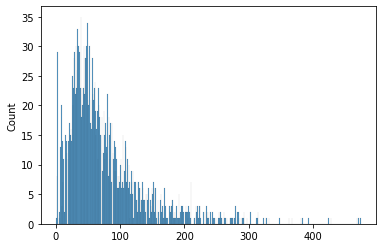

In [ ]:
import seaborn as sns
sns.histplot([len(x) for x in df.Comment], bins=500); # Chọn max_len=100

# Split data

In [ ]:
df.columns

Index(['User_name', 'Location_hotel', 'Hotel_name', 'Rating', 'Comment',
       'Service', 'Infrastructure', 'Sanitary', 'Location', 'Attitude'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Comment, df.loc[:,['Service', 'Infrastructure', 'Sanitary', 'Location', 'Attitude']], random_state=42, test_size=0.2)

In [ ]:
X_test

1547                                         ăn phong_phú
1411              kỳ nghỉ thoải_mái khách_sạn dịch_vụ tốt
480                        phòng dịch_vụ khu_nghỉ_mát tốt
617                        khu nghỉ_dưỡng đẹp dịch_vụ tốt
1489    yêu_cầu nhân_viên phòng 2 giường khách_sạn phò...
                              ...                        
1040                      đi vui dịch_vụ tốt cảm_ơn ivivu
1268                nhân_viên khách_sạn nhẹ_nhàng lịch_sự
464     đẹp góc_cạnh nhân_viên tư_vấn kỹ dịch_vụ tiện_...
1669    khách_sạn ok nhân_viên không_vấn_đề phòng sát ...
861     vị_trí thị_trấn bữa ăn không_phải hương_vị mẹ ...
Name: Comment, Length: 447, dtype: object

In [ ]:
y_test

,Service,Infrastructure,Sanitary,Location,Attitude
1547,1,0,0,0,0
1411,1,0,0,0,2
480,1,1,0,0,2
617,1,1,0,0,2
1489,1,0,0,0,0
...,...,...,...,...,...
1040,1,0,0,0,2
1268,1,0,0,0,2
464,1,1,0,0,1
1669,1,1,0,0,0


# PhoBERT data preprocessing

In [ ]:
!pip install transformers

In [ ]:
import tensorflow as tf
from transformers import AutoModel, AutoTokenizer # Thư viện BERT

def load_bert():
    v_phobert = AutoModel.from_pretrained("vinai/phobert-base") # vinai/phobert-large
    v_tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base", use_fast=False)# vinai/phobert-large
    return v_phobert, v_tokenizer
print("Chuẩn bị nạp model BERT....")
phobert, tokenizer = load_bert()
print("Đã nạp xong model BERT.")

Chuẩn bị nạp model BERT....


Downloading:   0%|          | 0.00/557 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.decoder.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/895k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Đã nạp xong model BERT.


In [ ]:
v_tokenized = []
for line in X_train:
    print("Truoc su ly:", line)
    line = tokenizer.encode(line)
    v_tokenized.append(line)
    print("Sau su ly:", line)

Truoc su ly: tốt không_có vấn_đề phàn_nàn
Sau su ly: [0, 167, 15146, 10, 220, 6840, 2]
Truoc su ly: khách_sạn khu hơi cũ kỹ thông_tin phòng sạch_sẽ nhân_viên nhiệt_tình nhân_viên ivivu tư_vấn đầy_đủ
Sau su ly: [0, 1299, 316, 1329, 633, 2199, 195, 292, 4767, 650, 3857, 650, 1384, 4104, 21639, 1408, 997, 2]
Truoc su ly: phòng đẹp sạch_sẽ nhân_viên dễ_thương thân_thiện
Sau su ly: [0, 292, 258, 4767, 650, 4924, 3188, 2]
Truoc su ly: gia_đình kỳ nghỉ tuyệt_vời khách_sạn sạch_sẽ đẹp nhân_viên thân_thiện dịp ️_️
Sau su ly: [0, 161, 560, 915, 1819, 1299, 4767, 258, 650, 3188, 867, 3, 1751, 3, 2]
Truoc su ly: hài_lòng chất_lượng dịch_vụ khu_nghỉ_mát thư_giãn nghĩa kỳ nghỉ
Sau su ly: [0, 2273, 390, 399, 55187, 13148, 4583, 1645, 560, 915, 2]
Truoc su ly: 10 xuất_sắc khách_sạn sạch_đẹp huế
Sau su ly: [0, 210, 1026, 1299, 16108, 4692, 5673, 2]
Truoc su ly: thang_máy vận_hành chậm đông chờ thang_máy nhân_viên dọn phòng không_thay bàn_chải đánh mà_còn lẫn_lộn bàn_chải đánh_răng phòng mặc_dù cố_tình 

In [ ]:
row=len(v_tokenized)
column=len(v_tokenized[20])
print(f'Rows:{row}, Column:{column}')
print("Shape of a list:",len(v_tokenized))

Rows:1784, Column:22
Shape of a list: 1784


In [ ]:
import numpy
import torch

In [ ]:
max_len = 80

# Chèn thêm số 1 vào cuối câu nếu như không đủ 80 từ
padded = []
for i in v_tokenized: 
  if (max_len - len(i)) >= 0:
    cmt_token = i + [1] * (max_len - len(i))
    padded.append(cmt_token)
  else: 
    cmt_token = i[:80]
    padded.append(cmt_token)
padded = numpy.array(padded)
print('padded:', padded[0])

padded: [    0   167 15146    10   220  6840     2     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1]


In [ ]:
# Đánh dấu các từ thêm vào = 0 để không tính vào quá trình lấy features
attention_mask = numpy.where(padded == 1, 0, 1)
print('attention mask:', attention_mask[0])

attention mask: [1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [ ]:
import pandas as pd 
df = pd.DataFrame(padded)
df.to_csv('data_PhoBERT_Xtrain.csv', index=False)

In [ ]:
v_tokenized = []
for line in X_test:
    print("Truoc su ly:", line)
    line = tokenizer.encode(line)
    v_tokenized.append(line)
    print("Sau su ly:", line)

Truoc su ly: ăn phong_phú
Sau su ly: [0, 203, 3221, 2]
Truoc su ly: kỳ nghỉ thoải_mái khách_sạn dịch_vụ tốt
Sau su ly: [0, 560, 915, 1937, 1299, 399, 167, 2]
Truoc su ly: phòng dịch_vụ khu_nghỉ_mát tốt
Sau su ly: [0, 292, 399, 55187, 13148, 167, 2]
Truoc su ly: khu nghỉ_dưỡng đẹp dịch_vụ tốt
Sau su ly: [0, 316, 3625, 258, 399, 167, 2]
Truoc su ly: yêu_cầu nhân_viên phòng 2 giường khách_sạn phòng 1 giường
Sau su ly: [0, 285, 650, 292, 76, 2639, 1299, 292, 99, 2639, 2]
Truoc su ly: phòng 4 rộng_rãi không_gian thoải_mái đồ ăn sạch_sẽ trưa phòng hơi nóng bật máy_lạnh tầm 10 phút thi phòng mát
Sau su ly: [0, 292, 163, 2616, 1152, 1937, 779, 203, 4767, 2018, 292, 1329, 898, 2340, 15778, 748, 210, 436, 201, 292, 2400, 2]
Truoc su ly: không_phù_hợp tiêu_chí
Sau su ly: [0, 15146, 549, 2099, 2]
Truoc su ly: nhìn_chung đáp_ứng nhu_cầu căn_bản thái_độ tốt vị_trí ổn phong_cách cổ_kính nói_chung tốt
Sau su ly: [0, 8792, 875, 634, 6903, 2489, 167, 442, 4752, 1288, 10690, 2169, 167, 2]
Truoc su ly: ph

In [ ]:
row=len(v_tokenized)
column=len(v_tokenized[20])
print(f'Rows:{row}, Column:{column}')
print("Shape of a list:",len(v_tokenized))

Rows:447, Column:10
Shape of a list: 447


In [ ]:
max_len = 80

# Chèn thêm số 1 vào cuối câu nếu như không đủ 80 từ
padded = []
for i in v_tokenized: 
  if (max_len - len(i)) >= 0:
    cmt_token = i + [1] * (max_len - len(i))
    padded.append(cmt_token)
  else: 
    cmt_token = i[:80]
    padded.append(cmt_token)
padded = numpy.array(padded)
print('padded:', padded[0])

padded: [   0  203 3221    2    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1]


In [ ]:
df = pd.DataFrame(padded)
df.to_csv('data_PhoBERT_Xtest.csv', index=False)

In [ ]:
df = pd.DataFrame(y_train)
df.to_csv('data_PhoBERT_ytrain.csv', index=False)

In [ ]:
df = pd.DataFrame(y_test)
df.to_csv('data_PhoBERT_ytest.csv', index=False)

# Fasttext data preprocessing

In [ ]:
!pip install fasttext

In [ ]:
import fasttext

In [ ]:
ft = fasttext.load_model('/content/drive/MyDrive/DS310/pre-train/cc.vi.100.bin')

In [ ]:
import numpy as np

In [ ]:
max_len = 80

# Chèn thêm số 1 vào cuối câu nếu như không đủ 80 từ
padded = []
for i in X_train: 
  if (max_len - len(i.split())) >= 0:
    cmt_token = i
    for j in range((max_len - len(i.split()))):
        cmt_token = cmt_token + " _"
    padded.append(cmt_token)
  else: 
    cmt_token = str(i.split()[0])
    for j in range(79):
      cmt_token = cmt_token + " " + str(i.split()[j + 1])
    padded.append(cmt_token)

padded = np.array(padded)
print('padded:', padded[0])

padded: tốt không_có vấn_đề phàn_nàn _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _


In [ ]:
v_tokenized = []
for line in padded:
    print("Truoc su ly:", line)
    line = [ft.get_word_vector(x) for x in line.split()]
    v_tokenized.append(line)
    print("Sau su ly:", line)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
       -0.01003836,  0.0515543 ,  0.02768018,  0.05474118, -0.02310224,
        0.063334  ,  0.09109547,  0.05915637,  0.00817094, -0.00471213,
       -0.01521395,  0.03256856,  0.02856523,  0.03411127,  0.04492794,
       -0.04496299,  0.02919538, -0.03011752,  0.04016855, -0.0254101 ],
      dtype=float32), array([-0.48685348,  0.2647766 ,  0.03319667, -0.04100059,  0.24147844,
        0.05283039, -0.02593898,  0.04864027,  0.10652311,  0.08237724,
        0.11332139,  0.04388936,  0.03403002, -0.03919643, -0.14143   ,
        0.14516866, -0.145745  ,  0.10112671, -0.08172834, -0.27916044,
        0.03629145,  0.00794843,  0.00438843,  0.02557573,  0.0731096 ,
       -0.00440428, -0.03839708, -0.05180223,  0.11905231, -0.12129641,
        0.12794404, -0.01865457, -0.01648058,  0.01779812, -0.16350695,
        0.01653776, -0.03052811, -0.03116037, -0.00552164,  0.01465517,
       -0.04721139, -0.12470366,  0.17581688,  0.1572063

In [ ]:
row=len(v_tokenized)
column=len(v_tokenized[6])
print(f'Rows:{row}, Column:{column}')
print("Shape of a list:",len(v_tokenized))

Rows:1784, Column:80
Shape of a list: 1784


In [ ]:
arr = np.array(v_tokenized).reshape(np.array(v_tokenized).shape[0], -1)

In [ ]:
arr.shape

(1784, 8000)

In [ ]:
np.array(v_tokenized).shape

(1784, 80, 100)

In [ ]:
import pandas as pd 
df = pd.DataFrame(arr)
df.to_csv('data_FastText_Xtrain.csv', index=False)

In [ ]:
max_len = 80

# Chèn thêm số 1 vào cuối câu nếu như không đủ 80 từ
padded = []
for i in X_test: 
  if (max_len - len(i.split())) >= 0:
    cmt_token = i
    for j in range((max_len - len(i.split()))):
        cmt_token = cmt_token + " _"
    padded.append(cmt_token)
  else: 
    cmt_token = str(i.split()[0])
    for j in range(79):
      cmt_token = cmt_token + " " + str(i.split()[j + 1])
    padded.append(cmt_token)

padded = np.array(padded)
print('padded:', padded[0])

padded: ăn phong_phú _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _


In [ ]:
v_tokenized_test = []
for line in padded:
    print("Truoc su ly:", line)
    line = [ft.get_word_vector(x) for x in line.split()]
    v_tokenized_test.append(line)
    print("Sau su ly:", line)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.

In [ ]:
arr_test = np.array(v_tokenized_test).reshape(np.array(v_tokenized_test).shape[0], -1)

In [ ]:
arr_test.shape

(447, 8000)

In [ ]:
np.array(v_tokenized_test).shape

(447, 80, 100)

In [ ]:
import pandas as pd 
df = pd.DataFrame(arr_test)
df.to_csv('data_FastText_Xtest.csv', index=False)

In [ ]:
df = pd.DataFrame(y_train)
df.to_csv('data_FastText_ytrain.csv', index=False)

In [ ]:
df = pd.DataFrame(y_test)
df.to_csv('data_FastText_ytest.csv', index=False)